# THE SPARKS FOUNDATION


# Name: - Amrita Gautam

# Domain: - IoT & Computer Vision

# Task: -  No. 4  Face Mask Detection (Real Time)

# Dataset used: - 

## https://esigelec-my.sharepoint.com/:f:/g/personal/cabani_esigelec_fr/Ev3GdnQSyzxPjyzU5ElHqagBlkRCaKnnCI85iX-d1L4OHA?e=G7uaYV

 Importing Libraries

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

 Reading Dataset images

In [2]:
img_array = cv2.imread('C:\\Users\\dksin\\Desktop\\Face Mask Dataset\\Face Mask\\00099_Mask.jpg')

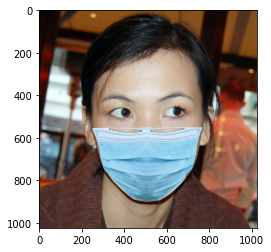

In [3]:
#plt.imshow(img_array)   ----> to just show the first image.
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # To show image in colour.

In [4]:
img_array.shape

(1024, 1024, 3)

In [5]:
Datadirectory = 'C:\\Users\\dksin\\Desktop\\Face Mask Dataset'
Classes = ["Face Mask","No Mask"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        #plt.show()
        break
    break
 

# Resizing images

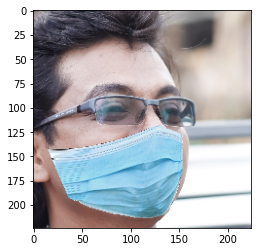

In [6]:
img_size = 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()


# Converting all images into array

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

205


# Data shuffling

In [10]:
import random
random.shuffle(training_Data)

In [12]:
X = [] # Represent data
y = [] # Represent labels

for features,label in training_Data:
    X.append(features)
    y.append(label)  
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(205, 224, 224, 3)

In [14]:
# Normalizing data

X = X/255.0

In [15]:
y[20]

1

In [16]:
Y = np.array(y)

# Saving the data

In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()



In [18]:

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in) 


# Deep Learning model

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Pre-trained model

In [20]:
model = tf.keras.applications.mobilenet.MobileNet() 

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Using Transfer Learning

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)
#final_output= layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs= base_input, outputs= final_output)

In [26]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [27]:
new_model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model

In [28]:
new_model.fit(X,Y, epochs = 2, validation_split=0.1)

Epoch 1/2
6/6 [==============================] - 101s 14s/step - loss: 1.9367 - accuracy: 0.8587 - val_loss: 0.1399 - val_accuracy: 0.9524
Epoch 2/2
6/6 [==============================] - 78s 13s/step - loss: 0.1667 - accuracy: 0.9891 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [29]:
new_model.save('my_model3.h5')

In [30]:
new_model = tf.keras.models.load_model('my_model3.h5')

## Network for prediction

In [31]:
frame = cv2.imread('C:\\Users\\dksin\\Desktop\\Face Mask Dataset\\Face Mask\\00089_Mask.jpg')

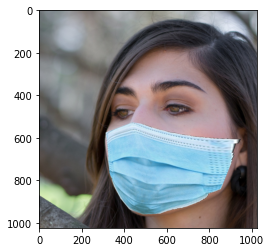

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [33]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)   # need fourth dimension
final_image = final_image/255.0

In [34]:
Prdictions = new_model.predict(final_image)

In [35]:
Prdictions

array([[-15.072843]], dtype=float32)

## Testing the network 

In [36]:
frame = cv2.imread('C:\\Users\\dksin\\Desktop\\sad_face.jpg')

In [37]:
frame.shape

(750, 500, 3)

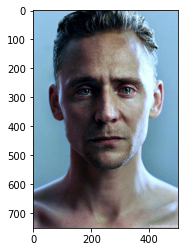

In [38]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(750, 500)

In [42]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w , y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]


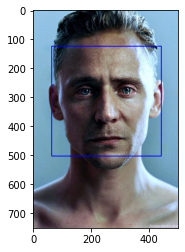

In [43]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

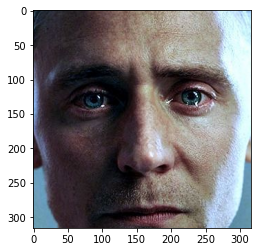

In [44]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [45]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)   # need fourth dimension
final_image = final_image/255.0

In [46]:
Predictions = new_model.predict(final_image)

In [47]:
Predictions

array([[19.249275]], dtype=float32)

## Real Time Face Mask Detection

In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
# setting the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros((500,500))
# set some text
text = "some text in box!"
# get the width and height of the text box
(text_width , text_height) = cv2.getTextSize(text, font, fontScale= font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coordinate of the box with the padding of two pixel
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2) )

cv2.rectangle(img, box_coords[0] , box_coords[1], rectangle_bgr, cv2.FILLED)

cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

#video_path = "./video.mp4"

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w , y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
     
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
    fm =cv2.resize(face_roi, (224,224))
    fm = np.expand_dims(fm, axis= 0)
    fm = fm/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    result = new_model.predict(fm)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (result<0):
        status = "No Mask"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    else:
        status = "Face Mask"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,00), 2)

        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))

    cv2.imshow("Fcae Mask Detection Tutorial", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
         break

cap.release()
cv2.destroyAllWindows()